In [2]:
import numpy as np

### Алгоритм Форда-Фалкерсона

In [28]:
def bfs(graph, source, sink, parent, num_vertices):
    visited = [False] * num_vertices
    queue = []
    queue.append(source)
    visited[source] = True

    while queue:
        u = queue.pop(0)

        for v in range(num_vertices):
            if not visited[v] and graph[u][v] > 0:
                queue.append(v)
                visited[v] = True
                parent[v] = u

                if v == sink:
                    return True
    return False

def ford_fulkerson(graph, source, sink, num_vertices):
    parent = [-1] * num_vertices
    max_flow = 0
    flow = [[0] * num_vertices for _ in range(num_vertices)] 
    while bfs(graph, source, sink, parent, num_vertices):
        path_flow = float('Inf')
        s = sink
        while s != source:
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]
        v = sink
        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            flow[u][v] += path_flow 
            v = parent[v]
        max_flow += path_flow
    return max_flow, flow

def write(V):
    num_vertices = len(V)  #кол-во вершин

    source = 0
    sink = num_vertices-1
    max_flow, flow_matrix = ford_fulkerson(V, source, sink, num_vertices)
    print("Максимальный поток:", max_flow)

    for u in range(num_vertices):
        for v in range(num_vertices):
            if flow_matrix[u][v] > 0:
                print(f"{u+1} -> {v+1}: {flow_matrix[u][v]}")

In [30]:
V = [
    [0, 3, 7, 0, 0, 0],
    [0, 0, 0, 3, 4 , 0],
    [0, 5, 0, 0, 3, 0],
    [0, 0, 0, 0, 3, 2],
    [0, 0, 0, 0, 0, 6],
    [0, 0, 0, 0, 0, 0]
]

In [31]:
write(V)

Максимальный поток: 8
1 -> 2: 3
1 -> 3: 5
2 -> 4: 2
2 -> 5: 3
3 -> 2: 2
3 -> 5: 3
4 -> 6: 2
5 -> 6: 6


In [46]:
V1 = [[0, 6, 6, 0, 0, 0, 0, 0],
          [0, 0, 0, 4, 2, 0, 0, 0],
          [0, 5, 0, 0, 9, 0, 0, 0],
          [0, 0, 0, 0, 0, 4, 2, 0],
          [0, 0, 0, 8, 0, 0, 7, 0],
          [0, 0, 0, 0, 0, 0, 0, 7],
          [0, 0, 0, 0, 0, 11, 0, 4],
          [0, 0, 0, 0, 0, 0, 0, 0]
              ]
write(V1)

Максимальный поток: 11
1 -> 2: 6
1 -> 3: 5
2 -> 4: 4
2 -> 5: 2
3 -> 5: 5
4 -> 6: 4
5 -> 7: 7
6 -> 8: 7
7 -> 6: 3
7 -> 8: 4


In [78]:
V2 = [
    [0,8,7,9,0,0,0,0,0],
    [0,0,4,0,3,0,0,0,0],
    [0,4,0,3,6,0,0,0,0],
    [0,0,4,0,0,5,0,8,0],
    [0,0,0,0,0,7,6,0,5],
    [0,0,0,0,7,0,0,5,0],
    [0,0,0,0,0,0,0,3,8],
    [0,0,0,0,0,0,3,0,7],
    [0,0,0,0,0,0,0,0,0]
]
write(V2)

Максимальный поток: 20
1 -> 2: 4
1 -> 3: 7
1 -> 4: 9
2 -> 3: 1
2 -> 5: 3
3 -> 4: 2
3 -> 5: 6
4 -> 6: 3
4 -> 8: 8
5 -> 7: 6
5 -> 9: 5
6 -> 5: 2
6 -> 8: 1
7 -> 9: 8
8 -> 7: 2
8 -> 9: 7


In [81]:
import networkx as nx
import numpy as np

V2 = np.array([
    [0,8,7,9,0,0,0,0,0],
    [0,0,4,0,3,0,0,0,0],
    [0,4,0,3,6,0,0,0,0],
    [0,0,4,0,0,5,0,8,0],
    [0,0,0,0,0,7,6,0,5],
    [0,0,0,0,7,0,0,5,0],
    [0,0,0,0,0,0,0,3,8],
    [0,0,0,0,0,0,3,0,7],
    [0,0,0,0,0,0,0,0,0]
])

G = nx.DiGraph()

num_nodes = len(V2)
for i in range(num_nodes):
    for j in range(num_nodes):
        if V2[i, j] > 0:
            G.add_edge(i, j, capacity=V2[i, j])

flow_value, flow_dict = nx.maximum_flow(G, 0, len(V2)-1)

print("Максимальный поток:", flow_value)
for u, v_dict in flow_dict.items():
    for v, flow in v_dict.items():
        if flow > 0:
            print(f"{u} -> {v}: {flow}")

Максимальный поток: 20
0 -> 1: 7
0 -> 2: 5
0 -> 3: 8
1 -> 2: 4
1 -> 4: 3
2 -> 3: 3
2 -> 4: 6
3 -> 5: 4
3 -> 7: 7
4 -> 6: 6
4 -> 8: 5
5 -> 4: 2
5 -> 7: 2
7 -> 6: 2
7 -> 8: 7
6 -> 8: 8


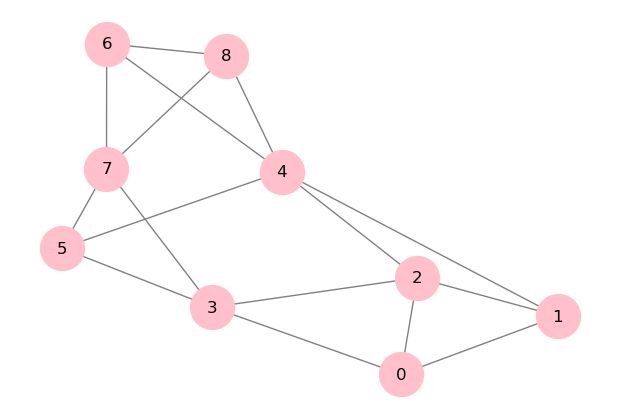

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(V2)

plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='pink', edge_color='gray', node_size=1000, font_size=12)
plt.show()